## Finding the Best Markets to Advertise In

We assume we're working for a company that offers several courses (but mainly of web and mobile development). We want to promote the product and want to choose the best markets to advertise in. 

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
print(data.shape)
print(data.columns)

(18175, 136)
Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)


In [55]:
job_interests = data['JobRoleInterest'].dropna()
jobs_table = job_interests.value_counts(normalize=True) * 100
jobs_table

Full-Stack Web Developer                                                                                                                                                                                                                               11.770595
  Front-End Web Developer                                                                                                                                                                                                                               6.435927
  Data Scientist                                                                                                                                                                                                                                        2.173913
Back-End Web Developer                                                                                                                                                                                                               

Some people seem to be interested in more than one subject. Need to find how many people total are interested in web and/or mobile development.

In [56]:
job_interests_split = job_interests.str.split(',')
num_subjects = job_interests_split.apply(lambda x: len(x))
num_subjects_table = num_subjects.value_counts(normalize=True)*100
num_subjects_table

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

About 32% of people are certain which subject they're interested in. 

In [57]:
web_mobile = job_interests.str.contains('Web|Mobile')
web_mobile_table = web_mobile.value_counts(normalize=True) * 100
web_mobile_table

True     86.298627
False    13.701373
Name: JobRoleInterest, dtype: float64

86% of people indicated that they're interested in either web or mobile development

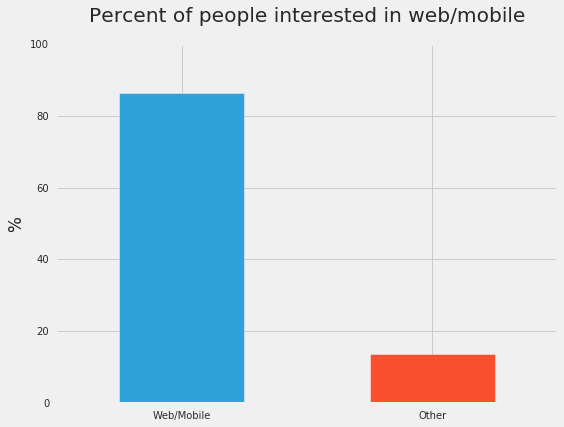

In [58]:
plt.style.use('fivethirtyeight')
web_mobile_table.plot.bar(figsize=(8,6))

plt.title('Percent of people interested in web/mobile', y=1.05)
plt.ylabel('%')
plt.xticks([0,1],['Web/Mobile', 'Other'], rotation = 0)
plt.ylim([0,100])
plt.show()

In [59]:
cleaned = data[data['JobRoleInterest'].notnull()].copy()
relative = cleaned['CountryLive'].value_counts(normalize=True) * 100
absolute = cleaned['CountryLive'].value_counts()
pd.DataFrame(data={'Percentage': relative, 'Counts': absolute})

,Counts,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


Based on the results, the US and India are the largest markets. Going in depth is necessary as there may be other factors that could influence chosen markets.

In [60]:
cleaned['MonthsProgramming'].replace(0, 1, inplace=True)
cleaned['Money_per_month'] = cleaned['MoneyForLearning'] / cleaned['MonthsProgramming']
cleaned = cleaned[cleaned['Money_per_month'].notnull()]
cleaned = cleaned[cleaned['CountryLive'].notnull()]

In [61]:
mean_spent = cleaned.groupby('CountryLive').mean()
mean_spent['Money_per_month']

CountryLive
Afghanistan                     0.000000
Albania                         7.111111
Algeria                         0.000000
Angola                        116.666667
Anguilla                        0.000000
Argentina                      55.984444
Australia                     419.268452
Austria                       936.208333
Azerbaijan                     25.555556
Bahrain                         0.000000
Bangladesh                    239.361883
Belarus                        21.323854
Belgium                        53.774510
Bosnia & Herzegovina           19.807540
Botswana                        0.000000
Brazil                         56.239402
Bulgaria                       75.833333
Cambodia                       10.079365
Cameroon                        0.946970
Canada                        113.510961
Cayman Islands                  0.000000
Channel Islands                 0.000000
Chile                         300.416667
China                         236.441270
Colo

Some countries seem to spend a lot more money than other more wealthy countries.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


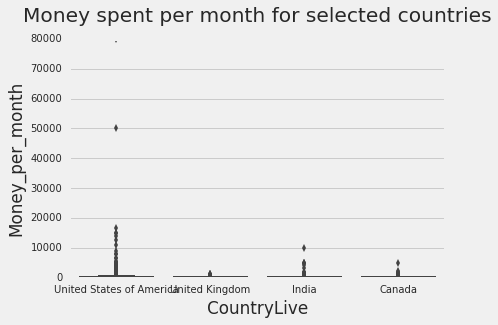

In [62]:
import seaborn as sns

countries = cleaned[cleaned['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]
sns.boxplot(x='CountryLive', y='Money_per_month', data=countries)

plt.title('Money spent per month for selected countries', y=1.05)
plt.show()

Some extreme outliers seem to exist for USA spending.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


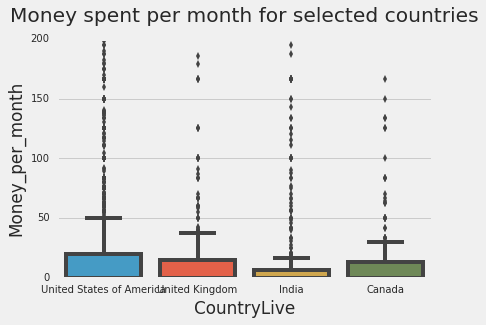

In [64]:
cleaned = cleaned[cleaned['Money_per_month'] < 500]
mean_spent = cleaned.groupby('CountryLive').mean()
countries = cleaned[cleaned['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]
sns.boxplot(x='CountryLive', y='Money_per_month', data=countries)

plt.title('Money spent per month for selected countries', y=1.05)
plt.show()

Even after removing very extreme outliers, there still exists a large variety of values for each country. It's relatively unclear which markets are the best other than for sure the US.